In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
%matplotlib inline

In [53]:
df = pd.read_csv('/Users/saurabh/Documents/PythonData/ESSdata_Thinkful.csv')

In [54]:
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8586 non-null float64
ppltrst    8580 non-null float64
pplfair    8555 non-null float64
pplhlp     8569 non-null float64
happy      8563 non-null float64
sclmeet    8579 non-null float64
sclact     8500 non-null float64
gndr       8584 non-null float64
agea       8355 non-null float64
partner    8577 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [9]:
df.columns

Index(['cntry', 'idno', 'year', 'tvtot', 'ppltrst', 'pplfair', 'pplhlp',
       'happy', 'sclmeet', 'sclact', 'gndr', 'agea', 'partner'],
      dtype='object')

In [105]:
df = df.dropna()

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8147 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8147 non-null object
idno       8147 non-null float64
year       8147 non-null int64
tvtot      8147 non-null float64
ppltrst    8147 non-null float64
pplfair    8147 non-null float64
pplhlp     8147 non-null float64
happy      8147 non-null float64
sclmeet    8147 non-null float64
sclact     8147 non-null float64
gndr       8147 non-null float64
agea       8147 non-null float64
partner    8147 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 891.1+ KB


## Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

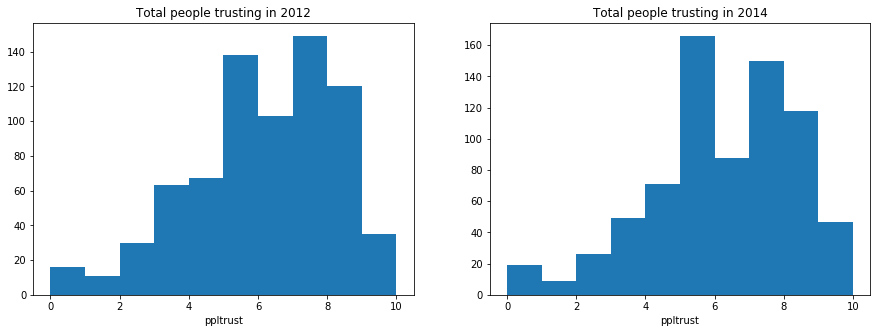

In [118]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(df[(df['cntry'] == 'CH') & (df['year'] == 6)]['ppltrst'])
plt.title('Total people trusting in 2012')
plt.xlabel('ppltrust')

plt.subplot(122)
plt.hist(df[(df['cntry'] == 'CH') & (df['year'] == 7)]['ppltrst'])
plt.title('Total people trusting in 2014')
plt.xlabel('ppltrust')

plt.show()

In [159]:
for country in df.cntry.unique():
    print(country, ':', stats.ttest_ind(df[(df['cntry'] == country) & (df['year'] == 6)]['ppltrst'], 
                      df[(df['cntry'] == country) & (df['year'] == 7)]['ppltrst']))

CH : Ttest_indResult(statistic=-0.7156974792217816, pvalue=0.4742916002909491)
CZ : Ttest_indResult(statistic=0.34075433231518504, pvalue=0.7333479315909976)
DE : Ttest_indResult(statistic=-0.3466213170125284, pvalue=0.7317764273785732)
ES : Ttest_indResult(statistic=2.1000674443244907, pvalue=0.03583204193521363)
NO : Ttest_indResult(statistic=0.5119224181145228, pvalue=0.6087850218131978)
SE : Ttest_indResult(statistic=-2.0268698056063146, pvalue=0.0428293634522298)


As pvalue for Spain and Sweden are statistically significant so people from these countries became less trusting from 2012 to 2014. while for the other countries they are not statistically significant so can not say people from those countries became less trusting from 2012 to 2014

## Did people become happier from 2012 to 2014? Compute results for each country in the sample

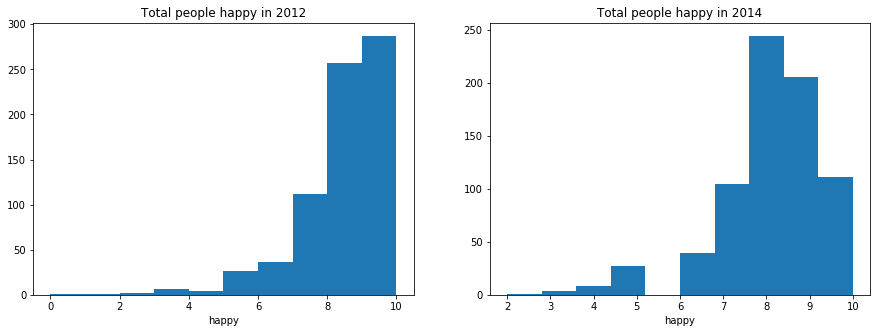

In [124]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(df[(df['cntry'] == 'CH') & (df['year'] == 6)]['happy'])
plt.title('Total people happy in 2012')
plt.xlabel('happy')

plt.subplot(122)
plt.hist(df[(df['cntry'] == 'CH') & (df['year'] == 7)]['happy'])
plt.title('Total people happy in 2014')
plt.xlabel('happy')

plt.show()

In [160]:
for country in df.cntry.unique():
    print(country, ':', stats.kruskal(df[(df['cntry'] == country) & (df['year'] == 6)]['happy'],
   df[(df['cntry'] == country) & (df['year'] == 7)]['happy']))

CH : KruskalResult(statistic=0.7393607796289999, pvalue=0.3898657201494511)
CZ : KruskalResult(statistic=0.7888702806828175, pvalue=0.37444194652901)
DE : KruskalResult(statistic=0.7954545454545382, pvalue=0.3724558699813717)
ES : KruskalResult(statistic=2.9615793608595036, pvalue=0.08526461865591295)
NO : KruskalResult(statistic=17.78863118177249, pvalue=2.4685385809958533e-05)
SE : KruskalResult(statistic=0.10011450993142058, pvalue=0.7516922609168144)


As pvalue for Spain is statistically significant so people from Spain became happier from 2012 to 2014.

## Who reported watching more TV in 2012, men or women?

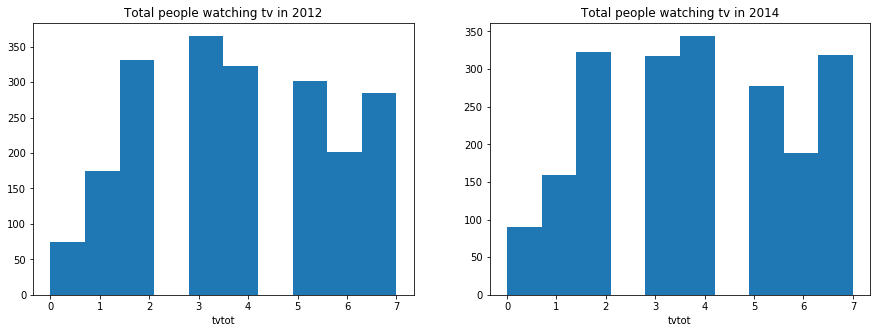

In [125]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(df[(df['gndr'] == 1) & (df['year'] == 6)]['tvtot'])
plt.title('Total people watching tv in 2012')
plt.xlabel('tvtot')

plt.subplot(122)
plt.hist(df[(df['gndr'] == 2) & (df['year'] == 6)]['tvtot'])
plt.title('Total people watching tv in 2014')
plt.xlabel('tvtot')

plt.show()

In [126]:
stats.kruskal(
    df[(df['gndr'] == 1) & (df['year'] == 6)]['tvtot'],
    df[(df['gndr'] == 2) & (df['year'] == 6)]['tvtot'])

KruskalResult(statistic=0.6145695087428265, pvalue=0.4330724786171142)

As pvalue is > 0.05 which leads to conclusion that two samples are most likely similar so can not say who reported watching more TV in 2012, men or women

## Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

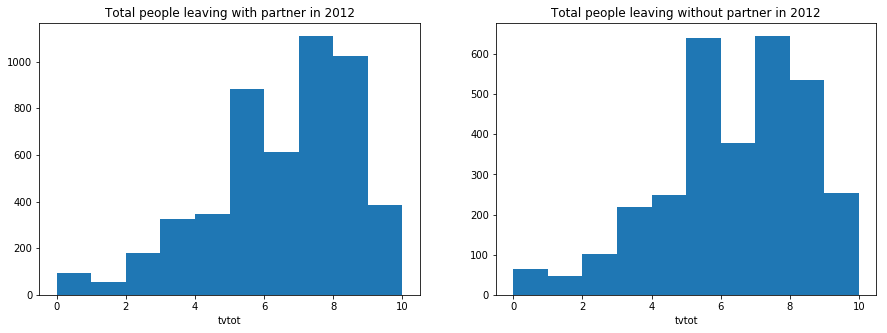

In [127]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(df[(df['partner'] == 1)]['pplfair'])
plt.title('Total people leaving with partner in 2012')
plt.xlabel('tvtot')

plt.subplot(122)
plt.hist(df[(df['partner'] == 2)]['pplfair'])
plt.title('Total people leaving without partner in 2012')
plt.xlabel('tvtot')

plt.show()

In [128]:
stats.kruskal(df[(df['partner'] == 1)]['pplfair'] , df[(df['partner'] == 2)]['pplfair'])

KruskalResult(statistic=12.699905564964231, pvalue=0.0003656740421476776)

As pvalue is < 0.05 which leads to conclusion that two samples are statistically significant so can say that people  living with a partner were fair than without partner in 2012

## Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

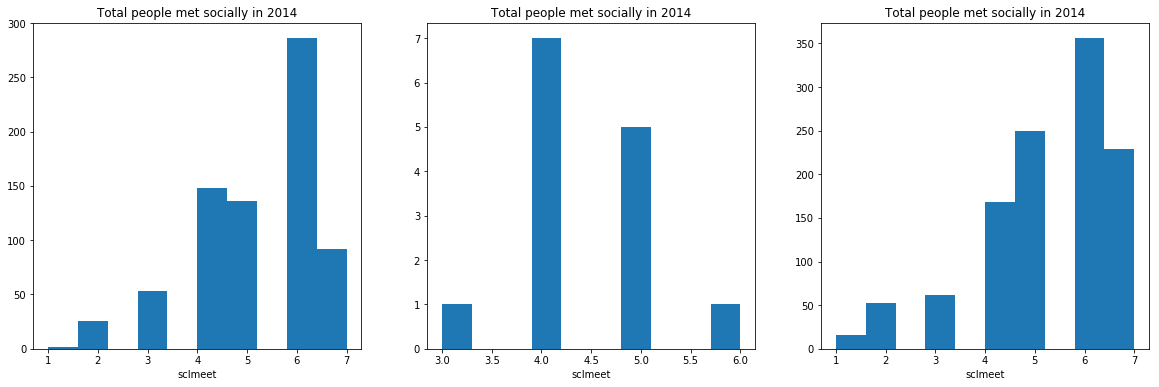

In [136]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(df[(df['year'] == 7) & (df['cntry'] == 'CH')]['sclmeet'])
plt.title('Total people met socially in 2014')
plt.xlabel('sclmeet')

plt.subplot(132)
plt.hist(df[(df['year'] == 7) & (df['cntry'] == 'DE')]['sclmeet'])
plt.title('Total people met socially in 2014')
plt.xlabel('sclmeet')

plt.subplot(133)
plt.hist(df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclmeet'])
plt.title('Total people met socially in 2014')
plt.xlabel('sclmeet')

plt.show()

In [137]:
stats.kruskal(df[(df['year'] == 7) & (df['cntry'] == 'CH')]['sclmeet'], 
              df[(df['year'] == 7) & (df['cntry'] == 'DE')]['sclmeet'],
              df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclmeet'])

KruskalResult(statistic=12.398774136896987, pvalue=0.0020306749196556226)

The above analysis shows pvalue is less than 5% so there are statistically significant differences between all three countries

In [144]:
# Printing the means for each group.
print('Mean Score social activities in Switzerland(CH) : ', df[(df['year'] == 7) & (df['cntry'] == 'CH')]['sclmeet'].mean())
print('Mean Score social activities in Germany(DE) : ', df[(df['year'] == 7) & (df['cntry'] == 'DE')]['sclmeet'].mean())
print('Mean Score social activities in Spain(ES) : ', df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclmeet'].mean())

F, p = stats.f_oneway(
     df[(df['year'] == 7) & (df['cntry'] == 'CH')]['sclmeet'],
     df[(df['year'] == 7) & (df['cntry'] == 'DE')]['sclmeet'],
     df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclmeet'])

# The F statistic.
print(F)

# The probability. A p < .05 would lead us to believe the group means were
# not all similar in the population.
print(p)

Mean Score social activities in Switzerland(CH) :  5.174966352624495
Mean Score social activities in Germany(DE) :  4.428571428571429
Mean Score social activities in Spain(ES) :  5.263668430335097
3.251979328884365
0.038914404595927585


As pvalue is less than 5% so there are statistically significant differences between all three countries and people from Spain are more socially meet with friends, relatives or colleagues compare to other two countries while in Germany less people socially meet compared to Spain and Switzerland.

## Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

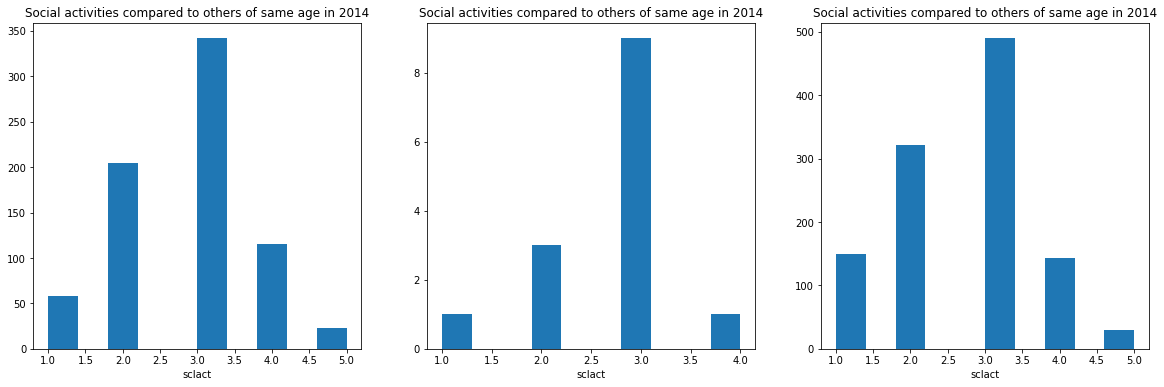

In [146]:
plt.figure(figsize=(20, 6))

plt.subplot(131)
plt.hist(df[(df['year'] == 7) & (df['cntry'] == 'CH')]['sclact'])
plt.title('Social activities compared to others of same age in 2014')
plt.xlabel('sclact')

plt.subplot(132)
plt.hist(df[(df['year'] == 7) & (df['cntry'] == 'DE')]['sclact'])
plt.title('Social activities compared to others of same age in 2014')
plt.xlabel('sclact')

plt.subplot(133)
plt.hist(df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclact'])
plt.title('Social activities compared to others of same age in 2014')
plt.xlabel('sclact')

plt.show()

In [147]:
stats.kruskal(df[(df['year'] == 7) & (df['cntry'] == 'CH')]['sclact'], 
              df[(df['year'] == 7) & (df['cntry'] == 'DE')]['sclact'],
              df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclact'])

KruskalResult(statistic=11.156562904978014, pvalue=0.003779054426025241)

The above analysis shows pvalue is less than 5% so there are statistically significant differences between all three countries.

In [148]:
print('Mean Score social activities in Switzerland(CH) : ', df[(df['year'] == 7) & (df['cntry'] == 'CH')]['sclact'].mean())
print('Mean Score social activities in Germany(DE) : ', df[(df['year'] == 7) & (df['cntry'] == 'DE')]['sclact'].mean())
print('Mean Score social activities in Spain(ES) : ', df[(df['year'] == 7) & (df['cntry'] == 'ES')]['sclact'].mean())

Mean Score social activities in Switzerland(CH) :  2.784656796769852
Mean Score social activities in Germany(DE) :  2.7142857142857144
Mean Score social activities in Spain(ES) :  2.631393298059965


Kruskal-Wallis test shows that there are statistically significant differences between all three countries.